In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
data=pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [6]:
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


XYZ Company has offices in four different zones. The company wishes to
investigate the following 

# The mean sales generated by each zone

In [7]:
print('Zone_A mean :',data['Zone - A'].mean())
print('Zone_B mean :',data['Zone - B'].mean())
print('Zone_C mean :',data['Zone - C'].mean())
print('Zone_D mean :',data['Zone - D'].mean())

Zone_A mean : 1540493.1379310344
Zone_B mean : 1755559.5862068965
Zone_C mean : 1772871.0344827587
Zone_D mean : 1842926.7586206896


# Total sales generated by all the zones for each month.


In [8]:
data['Total']=data['Zone - A']+data['Zone - B']+data['Zone - C']+data['Zone - D']

In [9]:
data.loc[:,['Month','Total']]

,Month,Total
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


# Check whether all the zones generate the same amount of sales.

In [21]:
# reshape the d dataframe suitable for statsmodels package 
data_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
# replace column names
data_melt.columns = ['index', 'treatments', 'value']


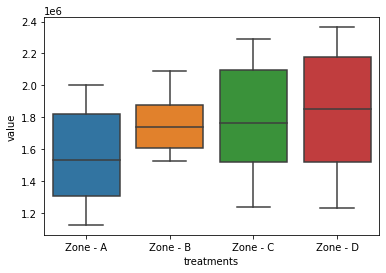

In [24]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=data_melt)

plt.show()

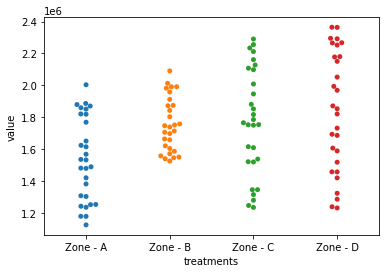

In [25]:
ax = sns.swarmplot(x="treatments", y="value", data=data_melt)

In [26]:
from scipy.stats import f_oneway

In [27]:
# Null hypothesis,H0: μ1 = μ2 = μ3 = μ4 :The mean sales amount is equal for each zones.
# Alternative hypothesis,H1:The mean sales amount  is different for atleast one zone.

In [16]:
import scipy.stats as stats

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

fvalue, pvalue = stats.f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'], data['Zone - D'])
print(fvalue, pvalue)

5.672056106843581 0.0011827601694503335


In [28]:
import scipy.stats

# f critical value
scipy.stats.f.ppf(q=1-0.05,dfn=3,dfd=25)

2.991240909549952

In [29]:
F, p = stats.f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'],data['Zone - D'])
print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0011827601694503335
reject null hypothesis


 Inference: The sales amount is different for atleast one zone.

In [19]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [20]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,1.483058e+12,4.943525e+11,5.672056,0.001183
Residual,112.0,9.761449e+12,8.715579e+10,NaN,NaN
